# Importing libraries and initial data checks

In [1]:
# import required libraries
import pandas as pd
import numpy as np

In [2]:
# read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/santhoshsai3/CMPE255-TermProject/main/ratings_Beauty.csv')
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


Brief information about the data.
This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on Amazon's website.
It contains:
1. the unique UserId (Customer Identification),
2. the product ASIN (Amazon's unique product identification code for each product),
3. Ratings (ranging from 1-5 based on customer satisfaction) 
4. the Timestamp of the rating (in UNIX time)

In [3]:
# check the first 5 rows
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
duplicates = df.duplicated(["UserId","ProductId", "Rating", "Timestamp"]).sum()
print(' Duplicate records: ',duplicates)

 Duplicate records:  0


See the number of unique values present

In [5]:
print('unique users:',len(df.UserId.unique()))
print('unique products:',len(df.ProductId.unique()))
print("total ratings: ",df.shape[0])

unique users: 1210271
unique products: 249274
total ratings:  2023070


Check for null values

In [6]:
df.isnull().any()

UserId       False
ProductId    False
Rating       False
Timestamp    False
dtype: bool

Number of rated products per user

In [7]:
products_user= df.groupby(by = "UserId")["Rating"].count().sort_values(ascending =False)
products_user.head()

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64

# Visualizing Data

In [8]:
import plotly.io as pio
pio.renderers.default = "svg"

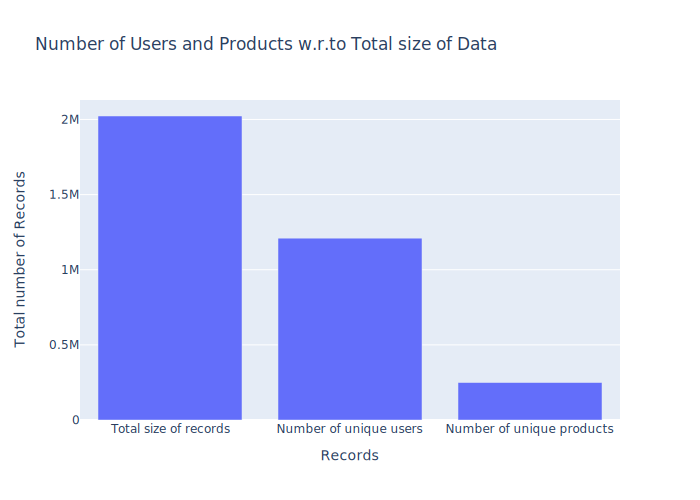

In [9]:
# plot the data
import plotly.graph_objects as go
index = ['Total size of records', "Number of unique users","Number of unique products"]
values =[len(df),len(df['UserId'].unique()),len(df['ProductId'].unique())]

plt = go.Figure([go.Bar(x=index, y=values,textposition='auto')])
plt.update_layout(title_text='Number of Users and Products w.r.to Total size of Data',
                    xaxis_title="Records",
                    yaxis_title="Total number of Records")

plt.show()

The above graph shows how the data is distributed in the dataset. The total number of records is 2M and total number of users is 1.2M which makes us conclude that on an average every user rates atleast twice. 
The total number of unique products is 250K. We can conclude that on an average, each product is rated atleast 8-10 times.

In [10]:
import plotly
plotly.__version__

'5.8.0'

### The ratings given by users

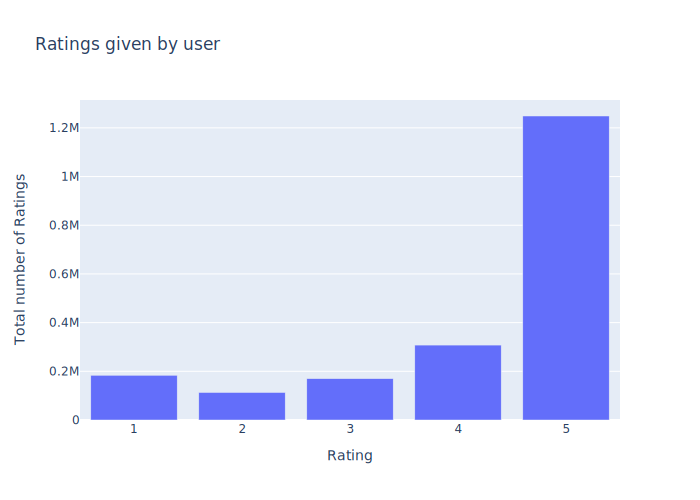

In [11]:
values = list(df['Rating'].value_counts())

plot = go.Figure([go.Bar(x = df['Rating'].value_counts().index, y = values,textposition='auto')])

plot.update_layout(title_text='Ratings given by user',
                    xaxis_title="Rating",
                    yaxis_title="Total number of Ratings")

plot.show()



The above graph shows the distribution of various ratings. The rating 5 was given by 1.2M users which is highest and rating 2 is given by 113k users which is lowest.

We can also see that that the sum of users which gave 1,2,3,4 ratings is still less that the users who gave rating 5.


### Popular Products

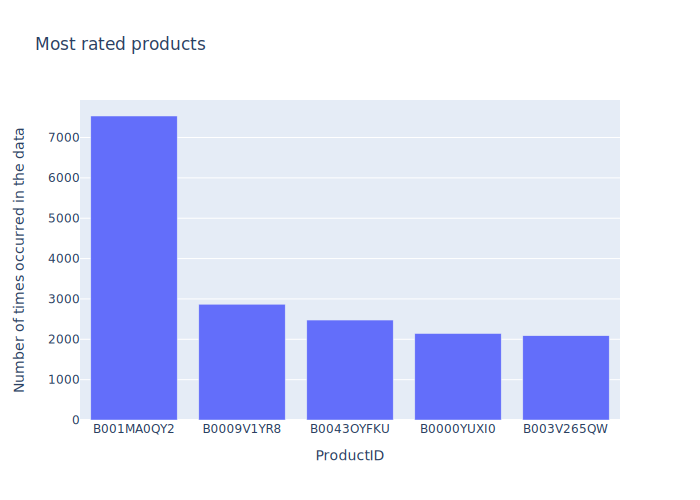

In [12]:
values = list(df['ProductId'].value_counts())


plot = go.Figure([go.Bar(x = df['ProductId'].value_counts().nlargest(5).index, y = values,textposition='auto')])

plot.update_layout(title_text='Most rated products',
                    xaxis_title="ProductID",
                    yaxis_title="Number of times occurred in the data")

plot.show()



1. The above graph shows that most popular products and their frequency. The most popular product is B001MA0QY2 which is rated by 7533 Users.
2. The number of ratings for the first popular product and second popular product is very high.

### Users vs number of products they have rated



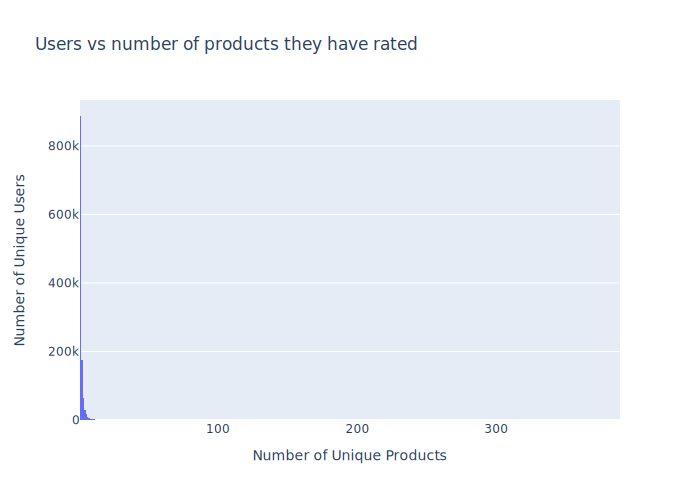

In [13]:
ratings_per_user = df.groupby('UserId')['Rating'].count().sort_values(ascending=False)
plot = go.Figure(data=[go.Histogram(x=ratings_per_user)])
plot.update_layout(title_text='Users vs number of products they have rated',
                    xaxis_title="Number of Unique Products",
                    yaxis_title="Number of Unique Users")


plot.show()



1. The above graph shows that most of the users have rated only one product.
2. When the number of products increase, the number of users rated that many products is decreasing sharply.
3. That maximum number of products rated by any user is 9 and 3181 Users have rated 9 products.
4. More that 80% of users have rated less that 4 products.

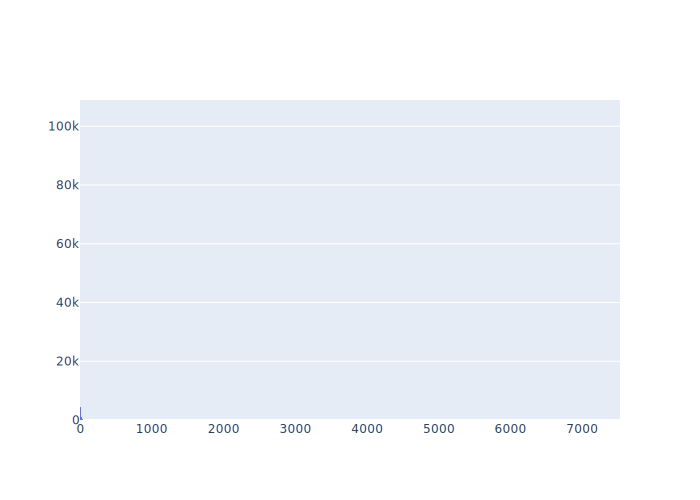

In [14]:
ratings_per_product = df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)
# print("Average rating given by each user: ",ratings_per_user.head())

plot = go.Figure(data=[go.Histogram(x=ratings_per_product)])
plot.show(title_text='Number of ratings per product',
                    xaxis_title="Product",
                    yaxis_title="Number of ratings")

1. Most of the products have received one rating.
2. The number of ratings decrease sharply when the products increase.

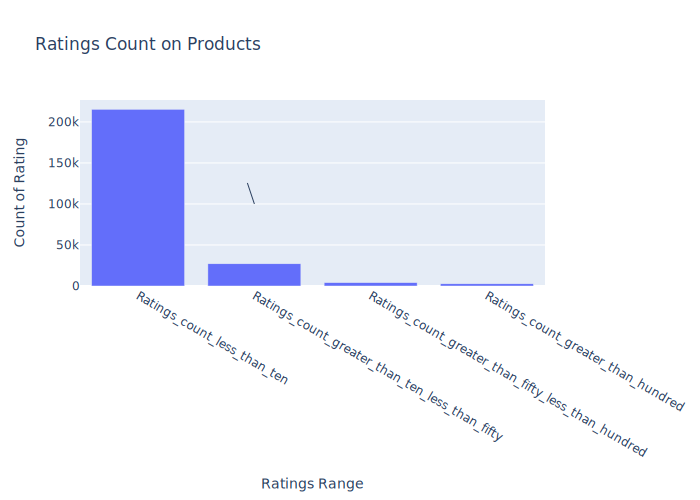

In [15]:

rating_of_products = df.groupby('ProductId')['Rating'].count()
# convert to make dataframe to analyse data
number_of_ratings_given = pd.DataFrame(rating_of_products)

less_than_ten = []
less_than_fifty_greater_than_ten = []
greater_than_fifty_less_than_hundred = []
greater_than_hundred = []
average_rating = []

for rating in number_of_ratings_given['Rating']:
    if rating <=10:
        less_than_ten.append(rating)
    if rating > 10 and rating <= 50:
        less_than_fifty_greater_than_ten.append(rating)
    if rating > 50 and rating <= 100:
        greater_than_fifty_less_than_hundred.append(rating)
    if rating > 100:
        greater_than_hundred.append(rating)

    average_rating.append(rating)

    
x_values = ["Ratings_count_less_than_ten","Ratings_count_greater_than_ten_less_than_fifty",
           "Ratings_count_greater_than_fifty_less_than_hundred","Ratings_count_greater_than_hundred"]
y_values = [len(less_than_ten),len(less_than_fifty_greater_than_ten),len(greater_than_fifty_less_than_hundred),
            len(greater_than_hundred)]


plot = go.Figure([go.Bar(x = x_values, y = y_values, textposition='auto')])

plot.add_annotation(
        x=1,
        y=100000,
        xref="x",
        yref="y")

plot.update_layout(title_text='Ratings Count on Products',
                    xaxis_title="Ratings Range",
                    yaxis_title="Count of Rating")
plot.show()







Observations:
1. Most of the products have been received less than 10 ratings.
2. Out of 200k products, 2000 products have received more than 100 ratings.
